<a href="https://colab.research.google.com/github/skdding3/Code-Practice/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##앙상블(Ensemble)
머신러닝 앙상블 -> 여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법

여러 모델을 이용하여 데이터를 학습하고, 
모든 모델의 예측결과를 평균하여 예측 

##앙상블 기법의 종류

* 보팅 (Voting): 투표를 통해 결과 도출
* 배깅 (Bagging): 샘플 중복 생성을 통해 결과 도출
* 부스팅 (Boosting): 이전 오차를 보완하면서 가중치 부여
* 스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

np.set_printoptions(suppress=True, precision=3)

In [9]:
from sklearn.datasets import load_boston

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [11]:
data = load_boston()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
from sklearn.model_selection import train_test_split
SEED = 30

x_train, x_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], random_state=SEED)

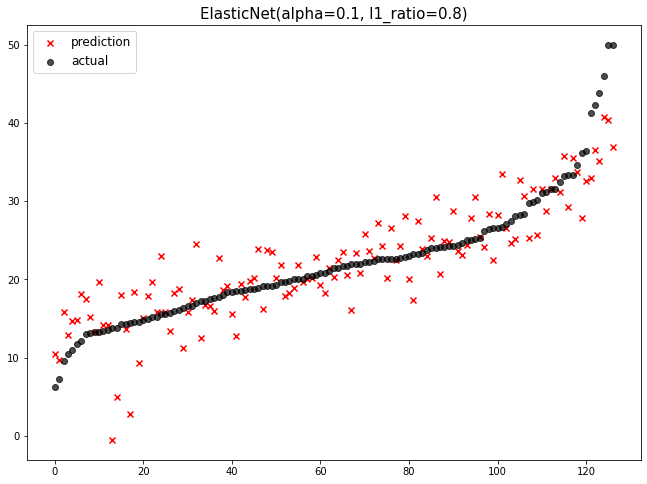

                                 model        mse
0  ElasticNet(alpha=0.1, l1_ratio=0.8)  16.638817


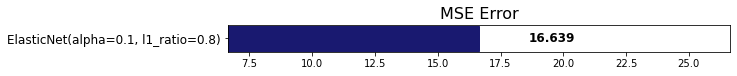

In [14]:
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(alpha=0.1, l1_ratio=0.8)', pred, y_test)

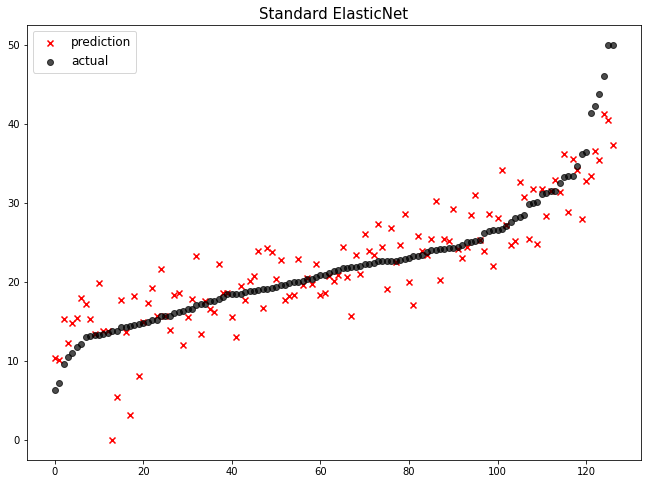

                                 model        mse
0  ElasticNet(alpha=0.1, l1_ratio=0.8)  16.638817
1                  Standard ElasticNet  16.423137


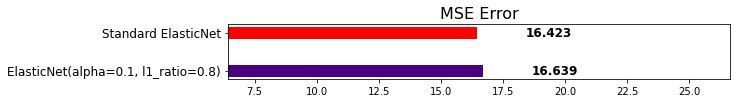

In [15]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.01, l1_ratio=0.8)
)
elasticnet_pipeline.fit(x_train, y_train)
elasticnet_pred = elasticnet_pipeline.predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)